In [4]:
# 훈련 Mask 이미지 저장 폴더 생성 및 이미지 다운로드 
import os
if not os.path.exists('./com/train') :
    os.makedirs('./com/train')

import six.moves.urllib as urllib

DOWNLOAD_URL = "https://storage.googleapis.com/openimages/v5/train-masks/"
DOWNLOAD_FILE = "train-masks-0.zip"
DOWNLOAD_PATH = "./com/train/"

opener = urllib.request.URLopener()
opener.addheader('User-Agent', 'ballentain')

opener.retrieve(DOWNLOAD_URL + DOWNLOAD_FILE, filename=DOWNLOAD_PATH + DOWNLOAD_FILE)
print('학습 이미지 압축 파일 다운로드 완료...')

# 압축 해제
import zipfile
zipfile.ZipFile(DOWNLOAD_PATH + DOWNLOAD_FILE).extractall(DOWNLOAD_PATH)
print('압축 해제 완료...')

학습 이미지 압축 파일 다운로드 완료...
압축 해제 완료...


In [40]:
# 50개의 샘플 이미지를 가지고 학습을 진행하겠다
import glob

image_x = 128
image_y = 128
list_images      = ([x for x in glob.glob('./com/train' + '/**')])
len_image = len(list_images)
# list_images=list_images[:len_image]

In [68]:
# 클래스 정보 csv 전처리
import glob
import pandas as pd
import cv2

ano = pd.read_csv('./com/pre_ano.csv', nrows=300)
pre_list_image = []
print(list_images[0])
for image_id in range(len_image):
    a = list_images[image_id]
    a = a.split('_')[1]
    class_n = a
    class_n = '/' + class_n 
    class_n = class_n[0:2] + '/' + class_n[2:]
    for k in range(300):
        if (ano['class_code'] == class_n).any():
            #class_ids = ano.loc[k][2]
            pre_list_image.append(list_images[image_id])

./com/train\0000048549557964_m0k4j_0f7c02af.png


IndexError: list index out of range

In [11]:
# downloader.py 다운로드
DOWNLOAD_URL = "https://raw.githubusercontent.com/openimages/dataset/master/"
DOWNLOAD_FILE = "downloader.py"
DOWNLOAD_PATH = "./com/"

opener = urllib.request.URLopener()
opener.addheader('User-Agent', 'ballentain')

opener.retrieve(DOWNLOAD_URL + DOWNLOAD_FILE, filename=DOWNLOAD_PATH + DOWNLOAD_FILE)
print('downloader.py 다운로드 완료...')

downloader.py 다운로드 완료...


In [ ]:
new_list_image = []
for j in range(len(pre_list_image)):
    new_list_image.append(pre_list_image[j].split('\\')[1].split('.png')[0])

import pickle

file = open("./com/TextFile.txt", "w");
with open("./com/TextFile.txt", "w") as file:
    for i in range(len(new_list_image)):
        file.write('train/' +new_list_image[i])
        file.write('\n')
file.close()

print(len(pre_list_image))

In [13]:
print(pre_list_image)
print("=============")
print(new_list_image)

['./com/train\\000004f4400f6ec5_m01n4qj_504d2571.png', './com/train\\000004f4400f6ec5_m039xj__42e86bfa.png', './com/train\\000004f4400f6ec5_m039xj__de6e1c20.png', './com/train\\0000071d71a0a6f6_m01g317_68be50fa.png', './com/train\\0000071d71a0a6f6_m01g317_84596065.png', './com/train\\0000071d71a0a6f6_m01rkbr_6a087162.png', './com/train\\0000071d71a0a6f6_m01xyhv_20f453bc.png', './com/train\\0000071d71a0a6f6_m01xyhv_e26c4efc.png', './com/train\\000018acd19b4ad3_m01yx86_99103322.png', './com/train\\000018acd19b4ad3_m01yx86_f4e0caa4.png', './com/train\\0000201cd362f303_m0342h_9b712332.png', './com/train\\0000201cd362f303_m03bt1vf_52f6d341.png', './com/train\\000020780ccee28d_m01g317_9096034e.png', './com/train\\000023aa04ab09ed_m01940j_f98dbb26.png', './com/train\\000023aa04ab09ed_m01g317_85a89a1b.png', './com/train\\0000253ea4ecbf19_m01lrl_b5b372c8.png', './com/train\\0000271195f2c007_m01bl7v_8d9fbf35.png', './com/train\\00002b368e91b947_m01cmb2_25eae60e.png', './com/train\\00002b368e91b9

In [ ]:
import com.downloader as downloader
from collections import defaultdict

args = defaultdict()
args['image_list']      = './com/TextFile.txt'
args['num_processes']     = 5
args['download_folder'] = './com/new_tra__/'

downloader.download_all_images(args)

In [ ]:
# Mask, RGB 이미지 resize
import os
import glob
from PIL import Image

# RGB 이미지
ori_list_image      = ([x for x in glob.glob('./com/new_tra__' + '/**')])    
files=ori_list_image

for f in files:
    img = Image.open(f)
    img_resize = img.resize((image_x, image_y))
    img_resize.save(f)

# Mask 이미지
list_images      = ([x for x in glob.glob('./com/train' + '/**')])    
files=list_images[:len_image]

for f in files:
    img = Image.open(f)
    img_resize = img.resize((image_x, image_y))
    img_resize.save(f)

In [ ]:
pre_list_image = sorted(pre_list_image)
ori_list_image = sorted(ori_list_image)

In [40]:
from urllib import request

WEIGHT_URL = "https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5"
WEIGHT_PATH = "./com/mask_rcnn_coco.h5"
if not os.path.isfile(WEIGHT_PATH):
    request.urlretrieve(WEIGHT_URL, WEIGHT_PATH)
    print("가중치 다운로드 완료...")
else :
    print("똑같은 가중치가 이미 존재합니다.")

MODEL_URL = "https://github.com/matterport/Mask_RCNN/archive/refs/heads/master.zip"
MODEL_PATH = "./com/master.zip"

if not os.path.isfile(MODEL_PATH):
    request.urlretrieve(MODEL_URL, MODEL_PATH)
    print("모델 다운로드 완료...")
else :
    print("똑같은 모델이 이미 존재합니다.")

if not os.path.exists(MODEL_PATH.split('/')[-1].split('.')[0]):
    zipfile.ZipFile(MODEL_PATH).extractall("./com")
    print('압축 해제 완료...')
else :
    print('이미 압축해제가 완료되었습니다.')

똑같은 가중치가 이미 존재합니다.
똑같은 모델이 이미 존재합니다.
압축 해제 완료...


In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = './com/Mask_RCNN-master'

# Local path to trained weights file
COCO_MODEL_PATH = './com/mask_rcnn_coco.h5'
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

In [ ]:
class ShapesConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = "object"

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    # GPU 하나당 학습할 이미지 수
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 300  # background + 3 shapes

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)  # anchor side in pixels

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 32

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 100

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 3
    DETECTION_MIN_CONFIDENCE    = 0.8
config = ShapesConfig()
config.display()

In [ ]:
class ShapesDataset(utils.Dataset):
    """Generates the shapes synthetic dataset. The dataset consists of simple
    shapes (triangles, squares, circles) placed randomly on a blank surface.
    The images are generated on the fly. No file access required.
    """


    def load_shapes(self, count, height, width):
        import pandas as pd
        # Class를 추가함
        # 총 300개의 클래스를 for 문으로 추가
        ano = pd.read_csv('./com/pre_ano.csv', nrows=300)
        for i in range(0, 300):
            word = ano.loc[i][1]
            num = ano.loc[i][2]
            self.add_class("object", int(num), word)
        # image_id = 파일 고유 이름
        for i in range(count):
            image1 = cv2.imread(pre_list_image[i])
            image1 = cv2.resize(image1, dsize = (image_x, image_y), interpolation=cv2.INTER_AREA)
            shapes = image1
            self.add_image("object", image_id=pre_list_image[i][15:], path=None, # image_id = i 였음
                           width=image_x, height=image_y,
                           shapes=[image_x, image_y, 3])

    def load_image(self, image_id):
        #Image를 불러옴 resize 돼있지만 혹시 모르니 한번 더
        ori_list_image  = ([x for x in glob.glob('./com/new_tra__' + '/**')])    
        ori_list_image = sorted(ori_list_image)
        image = cv2.imread(ori_list_image[image_id])
        image = cv2.resize(image, dsize = (image_x, image_y), interpolation=cv2.INTER_AREA)
        return image

    def image_reference(self, image_id):
        # 이미지 shape 출력
        shapes = image.shape
        return shapes

    def load_mask(self, image_id):
        import pandas as pd
        import glob

        list_class_ids = []
        ano = pd.read_csv('./com/pre_ano.csv', nrows=300)

        # MASK 는 0 or 255 라서 255부분을 1로 바꿈
        a = pre_list_image[image_id]
        mask = cv2.imread(a)
        mask = cv2.cvtColor(mask , cv2.COLOR_RGB2GRAY)
        mask = mask.reshape(image_x  , image_y, 1)
        for i in range(image_x) :
            for j in range(image_y):
                if mask[i][j] == 255:
                    mask[i][j] = 1
        # MASK 이름 중 고유 엔코더 값을 반환
        # Image 중 _ ~~ _ 에서 ~~가 엔코더 값임
        name = a[15:]
        e_name = []
        c = 0
        f = 0
        while (c != 1):
            if name[f] == '_':
                c = 1
            f += 1
        b = 0
        g = 0
        while(b != 1):
            g += 1
            if name[-g] == "_":
                b = 1
        # 기존에 pre_ano 는 /m/~~로 이루어져 있어서 수정이 필요함
        class_n = name[f:len(name) -g]
        class_n = '/' + class_n 
        class_n = class_n[0:2] + '/' + class_n[2:]
        #만약 같은게 있으면 class_ids에 pre_ano의 2번째 열인 숫자를 추가함
        for k in range(300):
            if class_n == ano.loc[k][0]:
                class_ids = ano.loc[k][2]
                list_class_ids.append(class_ids)
                class_ids = np.array(list_class_ids)

        return mask.astype(np.bool), class_ids.astype(np.int32)

In [ ]:
# Training dataset
dataset_train = ShapesDataset()
dataset_train.load_shapes(20, image_x, image_y)
dataset_train.prepare()

# Validation dataset
dataset_val = ShapesDataset()
dataset_val.load_shapes(20, image_x, image_y)
dataset_val.prepare()

In [29]:
print(dataset_train.)
print("====================")
print(dataset_val)

<bound method Dataset.prepare of <__main__.ShapesDataset object at 0x00000243B3D59160>>


In [ ]:
# 학습 모델 생성
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [31]:
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=100, 
            layers="all")


Starting at epoch 0. LR=0.0001

Checkpoint Path: ./com/Mask_RCNN-master\object20211116T1614\mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b

D:\python\pythonProejct\Mask-Rcnn\venv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\python\pythonProejct\Mask-Rcnn\venv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
D:\python\pythonProejct\Mask-Rcnn\venv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "












Epoch 1/100
100/100 [==============================] - 564s 6s/step - loss: 15.1323 - rpn_class_loss: 4.0591 - rpn_bbox_loss: 7.8074 - mrcnn_class_loss: 1.7262 - mrcnn_bbox_loss: 1.2225 - mrcnn_mask_loss: 0.3171 - val_loss: 1.3301 - val_rpn_class_loss: 0.1850 - val_rpn_bbox_loss: 1.1436 - val_mrcnn_class_loss: 0.0015 - val_mrcnn_bbox_loss: 0.0000e+00 - val_mrcnn_mask_loss: 0.0000e+00

Epoch 2/100
100/100 [==============================] - 545s 5s/step - loss: 1.4489 - rpn_class_loss: 0.1597 - rpn_bbox_loss: 0.8321 - mrcnn_class_loss: 0.0239 - mrcnn_bbox_loss: 0.3383 - mrcnn_mask_loss: 0.0948 - val_loss: 0.9728 - val_rpn_class_loss: 0.1563 - val_rpn_bbox_loss: 0.8158 - val_mrcnn_class_loss: 7.9775e-04 - val_mrcnn_bbox_loss: 0.0000e+00 - val_mrcnn_mask_loss: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 493s 5s/step - loss: 1.5474 - rpn_class_loss: 0.1182 - rpn_bbox_loss: 0.9521 - mrcnn_class_loss: 0.0393 - mrcnn_bbox_loss: 0.2571 - mrcnn_mask_loss: 0.1808 -

100/100 [==============================] - 472s 5s/step - loss: 1.1184 - rpn_class_loss: 0.0392 - rpn_bbox_loss: 0.4862 - mrcnn_class_loss: 0.0423 - mrcnn_bbox_loss: 0.2678 - mrcnn_mask_loss: 0.2830 - val_loss: 1.6243 - val_rpn_class_loss: 0.0413 - val_rpn_bbox_loss: 0.3640 - val_mrcnn_class_loss: 0.1023 - val_mrcnn_bbox_loss: 0.5976 - val_mrcnn_mask_loss: 0.5191
Epoch 17/100
100/100 [==============================] - 471s 5s/step - loss: 1.0228 - rpn_class_loss: 0.0351 - rpn_bbox_loss: 0.3739 - mrcnn_class_loss: 0.0361 - mrcnn_bbox_loss: 0.2619 - mrcnn_mask_loss: 0.3156 - val_loss: 3.4277 - val_rpn_class_loss: 0.0266 - val_rpn_bbox_loss: 0.1099 - val_mrcnn_class_loss: 0.4585 - val_mrcnn_bbox_loss: 2.1160 - val_mrcnn_mask_loss: 0.7168
Epoch 18/100
100/100 [==============================] - 476s 5s/step - loss: 1.1676 - rpn_class_loss: 0.0348 - rpn_bbox_loss: 0.3524 - mrcnn_class_loss: 0.0532 - mrcnn_bbox_loss: 0.3491 - mrcnn_mask_loss: 0.3780 - val_loss: 0.7373 - val_rpn_class_loss: 0.

Epoch 38/100
100/100 [==============================] - 470s 5s/step - loss: 0.9299 - rpn_class_loss: 0.0145 - rpn_bbox_loss: 0.2193 - mrcnn_class_loss: 0.0472 - mrcnn_bbox_loss: 0.1538 - mrcnn_mask_loss: 0.4951 - val_loss: 1.0991 - val_rpn_class_loss: 0.0121 - val_rpn_bbox_loss: 0.0860 - val_mrcnn_class_loss: 0.0702 - val_mrcnn_bbox_loss: 0.2557 - val_mrcnn_mask_loss: 0.6750
Epoch 39/100
100/100 [==============================] - 473s 5s/step - loss: 0.8550 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.1923 - mrcnn_class_loss: 0.0387 - mrcnn_bbox_loss: 0.1246 - mrcnn_mask_loss: 0.4853 - val_loss: 0.9545 - val_rpn_class_loss: 0.0142 - val_rpn_bbox_loss: 0.1155 - val_mrcnn_class_loss: 0.1058 - val_mrcnn_bbox_loss: 0.2412 - val_mrcnn_mask_loss: 0.4778
Epoch 40/100
100/100 [==============================] - 469s 5s/step - loss: 0.8634 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 0.2148 - mrcnn_class_loss: 0.0347 - mrcnn_bbox_loss: 0.1164 - mrcnn_mask_loss: 0.4835 - val_loss: 0.5650 - val_rpn_c

Epoch 60/100
100/100 [==============================] - 475s 5s/step - loss: 0.8480 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.1472 - mrcnn_class_loss: 0.0140 - mrcnn_bbox_loss: 0.1103 - mrcnn_mask_loss: 0.5684 - val_loss: 0.6566 - val_rpn_class_loss: 0.0055 - val_rpn_bbox_loss: 0.0727 - val_mrcnn_class_loss: 0.0122 - val_mrcnn_bbox_loss: 0.0435 - val_mrcnn_mask_loss: 0.5227
Epoch 61/100
100/100 [==============================] - 470s 5s/step - loss: 0.8472 - rpn_class_loss: 0.0078 - rpn_bbox_loss: 0.1840 - mrcnn_class_loss: 0.0087 - mrcnn_bbox_loss: 0.0927 - mrcnn_mask_loss: 0.5540 - val_loss: 0.9215 - val_rpn_class_loss: 0.0045 - val_rpn_bbox_loss: 0.1157 - val_mrcnn_class_loss: 0.0054 - val_mrcnn_bbox_loss: 0.1039 - val_mrcnn_mask_loss: 0.6920
Epoch 62/100
100/100 [==============================] - 474s 5s/step - loss: 0.8417 - rpn_class_loss: 0.0073 - rpn_bbox_loss: 0.1779 - mrcnn_class_loss: 0.0081 - mrcnn_bbox_loss: 0.0910 - mrcnn_mask_loss: 0.5573 - val_loss: 0.6975 - val_rpn_c

Epoch 82/100
100/100 [==============================] - 471s 5s/step - loss: 0.7903 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.1564 - mrcnn_class_loss: 0.0180 - mrcnn_bbox_loss: 0.0788 - mrcnn_mask_loss: 0.5314 - val_loss: 0.7150 - val_rpn_class_loss: 0.0066 - val_rpn_bbox_loss: 0.0458 - val_mrcnn_class_loss: 0.0133 - val_mrcnn_bbox_loss: 0.0801 - val_mrcnn_mask_loss: 0.5691
Epoch 83/100
100/100 [==============================] - 475s 5s/step - loss: 0.7843 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.1555 - mrcnn_class_loss: 0.0162 - mrcnn_bbox_loss: 0.0880 - mrcnn_mask_loss: 0.5193 - val_loss: 0.5589 - val_rpn_class_loss: 0.0070 - val_rpn_bbox_loss: 0.0414 - val_mrcnn_class_loss: 0.0043 - val_mrcnn_bbox_loss: 0.0288 - val_mrcnn_mask_loss: 0.4774
Epoch 84/100
100/100 [==============================] - 470s 5s/step - loss: 0.7822 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.1517 - mrcnn_class_loss: 0.0112 - mrcnn_bbox_loss: 0.0848 - mrcnn_mask_loss: 0.5293 - val_loss: 0.7061 - val_rpn_c

In [32]:
class InferenceConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir='./com/Mask_RCNN-master')

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = './com/Mask_RCNN-master/object20211116T1614/mask_rcnn_object_0100.h5'

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)


# 그대로 실행
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  ./com/Mask_RCNN-master/object20211116T1614/mask_rcnn_object_0100.h5
Re-starting from epoch 100


original_image           shape: (128, 128, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (313,)                min:    0.00000  max:  128.00000  int32
gt_class_id              shape: (1,)                  min:  223.00000  max:  223.00000  int32
gt_bbox                  shape: (1, 4)                min:   51.00000  max:   64.00000  int32
gt_mask                  shape: (128, 128, 1)         min:    0.00000  max:    1.00000  bool


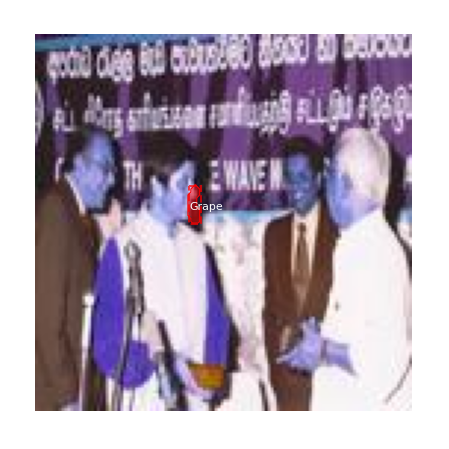

Processing 1 images
image                    shape: (128, 128, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min: -115.80000  max:  151.10000  float64
image_metas              shape: (1, 313)              min:    0.00000  max:  128.00000  int32
anchors                  shape: (1, 4092, 4)          min:   -0.71267  max:    1.20874  float32


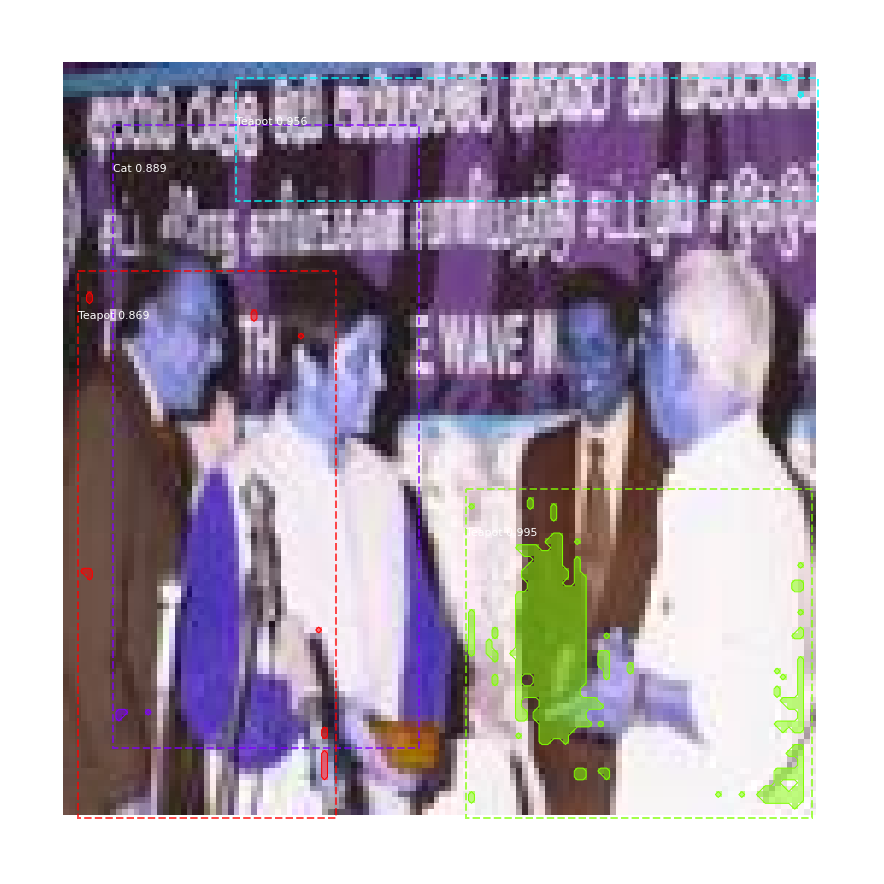

In [38]:
# Test on a random image
image_id = 1
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_train, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))
results = model.detect([original_image], verbose=1)


r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())
# visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
#                             dataset_val.class_names, r['scores'], ax = plt.subplots(1, figsize=figsize))

In [36]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
APs = []
for image_id in range(0, 50):
    try : 
        # Load image and ground truth data
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset_val, inference_config,
                                    image_id, use_mini_mask=False)
        molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
        # Run object detection
        results = model.detect([image], verbose=0)
        r = results[0]
        # Compute AP
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              r["rois"], r["class_ids"], r["scores"], r['masks'])
    except :
        AP = 0
    APs.append(AP)
      
print("mAP: ", np.mean(APs))

mAP:  0.13
